In [8]:
from tensorflow.keras import utils
utils.set_random_seed(0)

In [9]:
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [11]:
(x_train, y_train), (x_test, y_test) = data

In [12]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [13]:
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
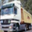

In [14]:
x_train[1]

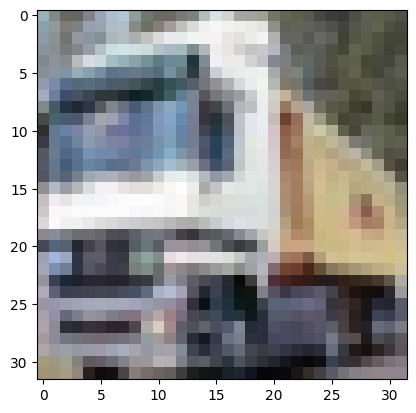

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [16]:
y_train[1]

array([9], dtype=uint8)

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [20]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [21]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        61,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,806 (1.13 MB)

 Trainable params: 295,806 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.3183 - loss: 1.8424 - val_accuracy: 0.5578 - val_loss: 1.2263
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5714 - loss: 1.1945 - val_accuracy: 0.6416 - val_loss: 1.0257
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6490 - loss: 0.9886 - val_accuracy: 0.6872 - val_loss: 0.8979
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6971 - loss: 0.8605 - val_accuracy: 0.6996 - val_loss: 0.8653
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7330 - loss: 0.7650 - val_accuracy: 0.7078 - val_loss: 0.8480
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7603 - loss: 0.6896 - val_accuracy: 0.7108 - val_loss: 0.8451
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7833 - loss: 0.6222 - val_accuracy: 0.7284 - val_loss: 0.8283
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8000 - loss: 0.5778 - val_accurac

In [30]:
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8417 - loss: 0.4507 - val_accuracy: 0.7216 - val_loss: 0.9641
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8546 - loss: 0.4162 - val_accuracy: 0.7372 - val_loss: 0.9277
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8629 - loss: 0.3908 - val_accuracy: 0.7350 - val_loss: 0.9969
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8700 - loss: 0.3639 - val_accuracy: 0.7442 - val_loss: 0.9858
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8794 - loss: 0.3341 - val_accuracy: 0.7308 - val_loss: 1.0811
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8875 - loss: 0.3158 - val_accuracy: 0.7292 - val_loss: 1.1376
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8936 - loss: 0.2974 - val_accuracy: 0.7340 - val_loss: 1.1319
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9048 - loss: 0.2638 - val_accura

In [32]:
import pandas as pd
df = pd.DataFrame(history.history)

<Axes: >

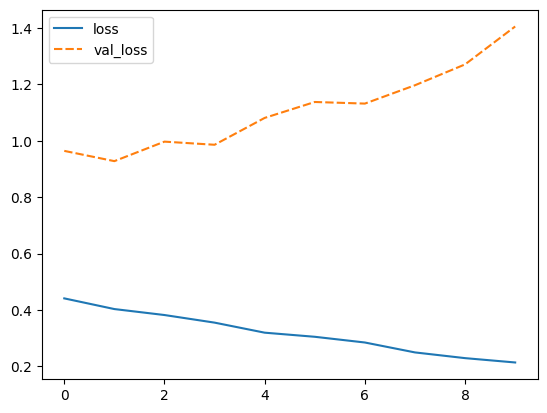

In [33]:
import seaborn as sns
sns.lineplot(data=df[['loss', 'val_loss']])

<Axes: >

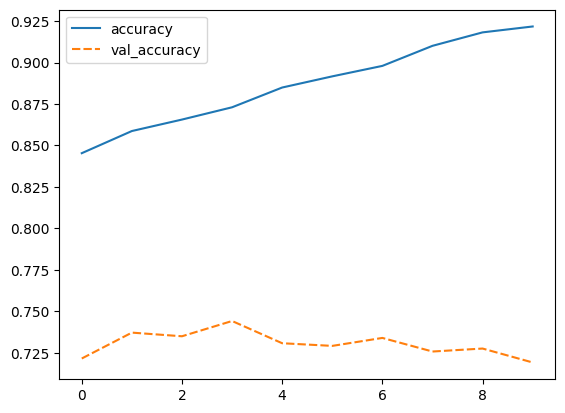

In [34]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [35]:
# 乱数の固定
utils.set_random_seed(0)

# モデル定義
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 誤差関数、最適化手法、評価関数の設定
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習
model.fit(x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3572 - loss: 1.7576 - val_accuracy: 0.5676 - val_loss: 1.2384
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5849 - loss: 1.1574 - val_accuracy: 0.6518 - val_loss: 0.9952
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6543 - loss: 0.9769 - val_accuracy: 0.6748 - val_loss: 0.9347
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6948 - loss: 0.8670 - val_accuracy: 0.6860 - val_loss: 0.9144
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7230 - loss: 0.7855 - val_accuracy: 0.7028 - val_loss: 0.8866


In [36]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6922 - loss: 0.8895


[0.9017747044563293, 0.6890000104904175]

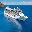

In [45]:
from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('/content/ship.png', target_size=(32, 32))
unknown_img

In [46]:
from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)

In [47]:
unknown_array = unknown_array/255

In [48]:
unknown_array.shape

(32, 32, 3)

In [49]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [50]:
unknown_array = unknown_array.reshape((1, 32, 32, 3))
unknown_array.shape

(1, 32, 32, 3)

In [51]:
result = model.predict(unknown_array)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[2.3709080e-01, 5.0124308e-05, 7.8525319e-04, 6.1468665e-05,
        3.7627935e-05, 9.2114409e-05, 5.2365515e-04, 8.0187067e-07,
        7.6135164e-01, 6.5407626e-06]], dtype=float32)

<Axes: >

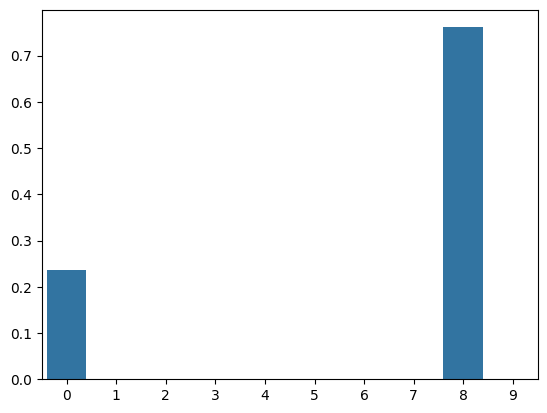

In [52]:
sns.barplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=result[0])